<a href="https://colab.research.google.com/github/delas/tiramisu/blob/master/pm4py/tiramisu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pm4py

In [61]:
log = """
caseid;time;activity
c1;2023-01-01;bedroom
c1;2023-01-02;kitchen
c1;2023-01-03;bathroom
c1;2023-01-04;entrance
c2;2023-01-01;bedroom
c2;2023-01-02;bathroom
c2;2023-01-03;kitchen
c2;2023-01-04;entrance
c3;2023-01-01;bedroom
c3;2023-01-02;bathroom
c3;2023-01-03;kitchen
c3;2023-01-04;living
"""

import pandas as pd
from io import StringIO
import pm4py

dataframe = pd.read_csv(StringIO(log), sep=";")
dataframe = pm4py.format_dataframe(dataframe, case_id="caseid", activity_key="activity", timestamp_key="time")
event_log = pm4py.convert_to_event_log(dataframe)

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:508: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


b'5\nbedroom\nkitchen\nbathroom\nentrance\nliving\n1\n0x1\n2\n3x1\n4x1\n0>1x1\n1>2x1\n2>3x1\n0>2x2\n2>1x2\n1>3x1\n1>4x1\n'


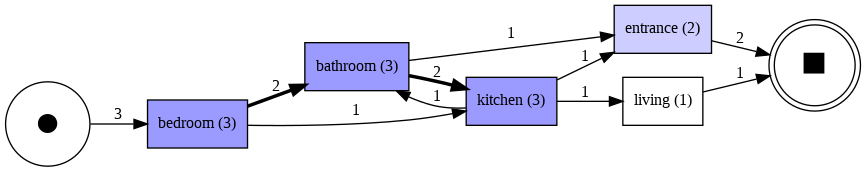

In [66]:
import tempfile
tmp = tempfile.TemporaryFile()


dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
print(pm4py.objects.dfg.exporter.variants.classic.export_as_string(dfg))

pm4py.view_dfg(dfg, start_activities, end_activities)